('train_classification accuracy k = 1:', 1.0)
('train classification accuracy k = 15:', 0.9637142857142857)
('test classification accuracy k = 1:', 0.96875)
('test classification accuracy k = 15:', 0.961)
('total_accuracy for k=1 is: ', 96.57142857142857)
('total_accuracy for k=2 is: ', 96.57142857142857)
('total_accuracy for k=3 is: ', 96.62857142857145)
('total_accuracy for k=4 is: ', 96.81428571428572)
('total_accuracy for k=5 is: ', 96.48571428571428)
('total_accuracy for k=6 is: ', 96.51428571428573)
('total_accuracy for k=7 is: ', 96.21428571428572)
('total_accuracy for k=8 is: ', 96.2142857142857)
('total_accuracy for k=9 is: ', 95.91428571428573)
('total_accuracy for k=10 is: ', 95.89999999999999)
('total_accuracy for k=11 is: ', 95.77142857142859)
('total_accuracy for k=12 is: ', 95.74285714285713)
('total_accuracy for k=13 is: ', 95.45714285714286)
('total_accuracy for k=14 is: ', 95.48571428571428)
('total_accuracy for k=15 is: ', 95.21428571428571)


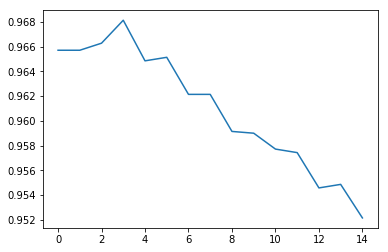

In [4]:
'''
K-NN classifier.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from collections import Counter

class KNearestNeighbor(object):
    '''
    K Nearest Neighbor classifier
    '''

    def __init__(self, train_data, train_labels):
        self.train_data = train_data
        self.train_norm = (self.train_data**2).sum(axis=1).reshape(-1,1)
        self.train_labels = train_labels
        self.label_counts = Counter(self.train_labels)

    def l2_distance(self, test_point):
        '''
        Compute L2 distance between test point and each training point
        
        Input: test_point is a 1d numpy array
        Output: dist is a numpy array containing the distances between the test point and each training point
        '''
        # Process test point shape
        test_point = np.squeeze(test_point)
        if test_point.ndim == 1:
            test_point = test_point.reshape(1, -1)
        assert test_point.shape[1] == self.train_data.shape[1]

        # Compute squared distance
        test_norm = (test_point**2).sum(axis=1).reshape(1,-1)
        dist = self.train_norm + test_norm - 2*self.train_data.dot(test_point.transpose())
        return np.squeeze(dist)

    def query_knn(self, test_point, k):
        '''
        Query a single test point using the k-NN algorithm

        You should return the digit label provided by the algorithm
        '''
        dist = self.l2_distance(test_point)
        k_smallest_indexes = np.argsort(dist)[:k]
        k_smallest_classes = self.train_labels[k_smallest_indexes]
        
        digit = self.knn_query_helper(k_smallest_indexes, k_smallest_classes)
        return digit

    def knn_query_helper(self, k_smallest_indexes, k_smallest_classes):
        """
            k_smallest_indexes is an array containing k indexes of training data that have the smallest l2 distance from test_point
            k_smallest_classes is an array containing k classes corresponding to k_smallest_indexes
            returns digit that corrensponds to class number
        """

        """
            Tie breaking strategy:
                When there is a tie return the class that happens to appear first in the list of k closest neighbors.
        """
        k_smallest_classes = self.train_labels[k_smallest_indexes]
        if (len(k_smallest_indexes) == 1): 
            return k_smallest_classes[0]
        else:
            counts = Counter(k_smallest_classes)
            counts_of_classes = [] # [(class, count)...]
            
            for each in counts.keys():
                counts_of_classes.append((each, counts[each]))
                
            counts_of_classes_sorted = sorted(counts_of_classes, key=lambda x: x[1], reverse=True)
            
            if (len(counts_of_classes_sorted) > 1 and counts_of_classes_sorted[0][1] == counts_of_classes_sorted[1][1]):

                max_count_value = sorted(counts.values(), reverse=True)[0]
                top_classes = [ elem[0] for elem in counts_of_classes_sorted if elem[1] == max_count_value]
                digit = top_classes[0]
                for label in k_smallest_classes:
                    if label in top_classes:
                        digit = label
                        break
                
                return digit
            else:
                # return class with highest count
                return counts_of_classes_sorted[0][0]


def cross_validation(train_data, train_labels, k_range=np.arange(1,16)):
    '''
    Perform 10-fold cross validation to find the best value for k
    '''
    accuracy_values = []
    for k in k_range:
        # Loop over folds
        # Evaluate k-NN
        kf = KFold(n_splits=10)
        total_accuracy = 0
        for train_index, validation_index in kf.split(train_data):
            X_train = train_data[train_index]
            y_train = train_labels[train_index]
            X_validate = train_data[validation_index]
            y_validate = train_labels[validation_index]
            knn = KNearestNeighbor(X_train, y_train)
            fold_accuracy = classification_accuracy(knn, k, X_validate, y_validate)
            total_accuracy += fold_accuracy
        total_accuracy /= 10
        accuracy_values.append(total_accuracy)
        print("total_accuracy for k="+str(k) + " is: ", total_accuracy*100)
    plt.plot(accuracy_values)
    plt.show()


def classification_accuracy(knn, k, eval_data, eval_labels):
    '''
    Evaluate the classification accuracy of knn on the given 'eval_data'
    using the labels
    '''
    count = 0
    for i in range(len(eval_data)):
        digit = knn.query_knn(eval_data[i], k)
        if (digit == eval_labels[i]): count += 1
    
    accuracy = float(count)/len(eval_data)
    return accuracy

def main():
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')
    knn = KNearestNeighbor(train_data, train_labels)

    print("train_classification accuracy k = 1:", classification_accuracy(knn, 1, train_data, train_labels))
    print("train classification accuracy k = 15:", classification_accuracy(knn, 15, train_data, train_labels))

    print("test classification accuracy k = 1:", classification_accuracy(knn, 1, test_data, test_labels))
    print("test classification accuracy k = 15:", classification_accuracy(knn, 15, test_data, test_labels))
    cross_validation(train_data, train_labels)

if __name__ == '__main__':
    main()
